# LOAD MODELS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline
from nidocr.model import OCR
ocr=OCR("models")

Segmentation Models: using `tf.keras` framework.
#LOG     :Extractor Loaded
#LOG     :Extractor Initialized
#LOG     :Loaded Detection Model,craft
#LOG     :Detector Loaded
#LOG     :Detector Initialized
#LOG     :Label len:80
#LOG     :Vocab len:1504
#LOG     :Pad Value:1506
#LOG     :Start End:1505
#LOG     :encm loaded
#LOG     :seqm loaded
#LOG     :posm loaded
#LOG     :fusm loaded
#LOG     :Recognizer Loaded


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

#LOG     :Recognizer Initialized
#LOG     :Face Matcher Initialized


# Start

#LOG     :------------------------------------------------
#LOG     :Data
#LOG     :------------------------------------------------


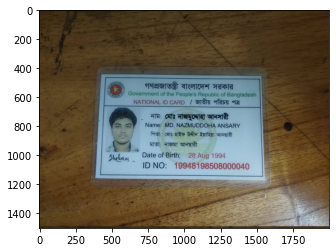

In [7]:
from nidocr.utils import *
from nidocr.data  import card
# card_type="smart"
# if card_type=="nid":
#     src=card.nid.front
#     region_dict=card.nid.front.box_dict
# else:
#     src=card.smart.front
#     region_dict=card.smart.front.box_dict
img=cv2.imread(f"tests/t3.jpg")
display_data("Data",img)

In [ ]:
face,sign,data=ocr.extract(img)
display_data("face",face,cv_color=False)
display_data("sign",sign,cv_color=False)
data

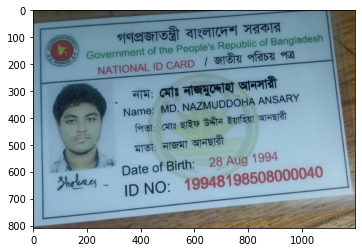

In [8]:
card_type,img=ocr.extractor.process(img)
plt.imshow(img)
plt.show()

if card_type=="nid": 
    src=card.nid.front
    two_step_recog=True
else: 
    src=card.smart.front
    two_step_recog=False

# face and sign
img=cv2.resize(img,(card.width,card.height))

# boxes
text_boxes=ocr.detect_boxes(img)
box_dict,df=ocr.process_boxes(text_boxes,src.box_dict)

In [9]:
df

,box,field
0,"[401, 212, 467, 248]",Bangla Name
1,"[473, 200, 644, 247]",Bangla Name
2,"[649, 184, 780, 231]",Bangla Name
3,"[405, 265, 467, 293]",English Name
4,"[474, 246, 709, 287]",English Name
5,"[539, 299, 607, 329]",English Name
6,"[614, 293, 705, 326]",English Name
7,"[713, 283, 809, 316]",English Name
8,"[409, 367, 494, 396]",Fathers Name
9,"[501, 349, 609, 388]",Fathers Name


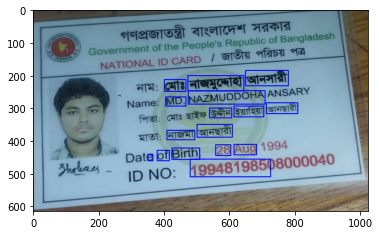

In [11]:
boxes=df.box.tolist()
plt.imshow(img)
for box in boxes:
    x_min,y_min,x_max,y_max=box
    cv2.rectangle(img, (x_min,y_min), (x_max,y_max), (0,0,255), 2)
plt.show()